In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile

In [8]:
zfile = ZipFile('C:/Users/Javi/00_raw_data/netflix_titles.csv.zip')

csv_file = zfile.open(zfile.filelist[0])
netflix = pd.read_csv(csv_file)

csv_file.close()
zfile.close()

In [12]:
print(netflix.shape)
netflix.head()

(6234, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [13]:
print(netflix.shape)
print(netflix.columns)

(6234, 12)
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


### Getting the percent of NaN for each column

In [33]:
nan_percent = pd.DataFrame(round(netflix.isna().mean(), 2)).reset_index()
nan_percent.columns = ['column', 'percent_of_nan']
nan_percent

,column,percent_of_nan
0,show_id,0.00
1,type,0.00
2,title,0.00
3,director,0.32
4,cast,0.09
5,country,0.08
6,date_added,0.00
7,release_year,0.00
8,rating,0.00
9,duration,0.00


In [34]:
nan = [(c, round(netflix[c].isna().mean() * 100, 2)) for c in netflix]
nan_percent = pd.DataFrame(nan, columns=['column', 'percent_of_nan'])
nan_percent

,column,percent_of_nan
0,show_id,0.00
1,type,0.00
2,title,0.00
3,director,31.58
4,cast,9.14
5,country,7.64
6,date_added,0.18
7,release_year,0.00
8,rating,0.16
9,duration,0.00


### TV shows vs Movies

In [6]:
shows = netflix[netflix['type'] == 'TV Show']
movies = netflix[netflix['type'] == 'Movie']

<BarContainer object of 2 artists>

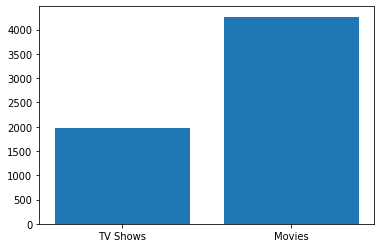

In [7]:
plt.bar(['TV Shows', 'Movies'], [shows['type'].count(), movies['type'].count()])

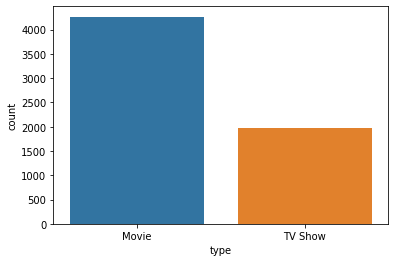

In [8]:
sns.countplot(x='type', data=netflix)

### Netflix added dates

In [9]:
netflix_date = netflix[['date_added']].dropna()
netflix_date

,date_added
0,"September 9, 2019"
1,"September 9, 2016"
2,"September 8, 2018"
3,"September 8, 2018"
4,"September 8, 2017"
...,...
6218,"April 10, 2019"
6219,"April 1, 2019"
6220,"April 1, 2016"
6221,"April 1, 2016"


In [10]:
netflix_date['year'] = netflix_date['date_added'].apply(lambda x: x.split(', ')[1])

In [11]:
netflix_date['month'] = netflix_date['date_added'].apply(lambda x: x.split(' ')[0])

In [12]:
netflix_date.groupby(['year', 'month']).agg({'month': 'count'})

month
year month           
2008 February       1
     January        1
2009 May            1
     November       1
2010 November       1
...               ...
2019 November     258
     October      193
     September    136
2020               10
     January      174

[99 rows x 1 columns]

In [13]:
netflix_date.groupby(['year', 'month'])['month'].count().sort_values(ascending=False)

year  month    
2019               292
      November     258
      December     214
      October      193
2018  December     183
                  ... 
2014  February       1
      July           1
      June           1
      September      1
2008  February       1
Name: month, Length: 99, dtype: int64

### Ratings

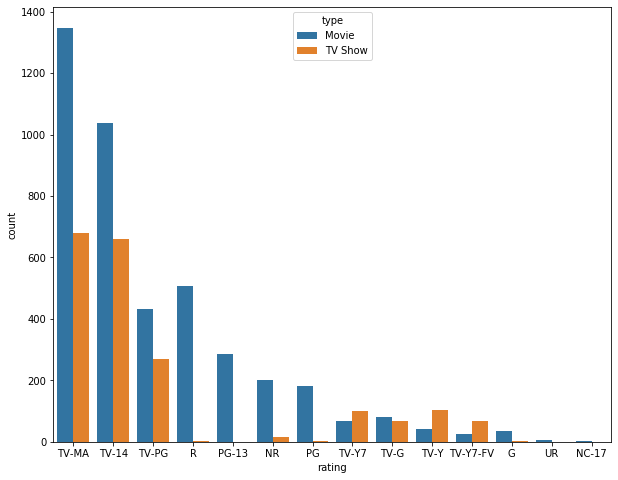

In [44]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating', data=netflix, hue='type', order=netflix['rating'].value_counts().index[:15])

In [51]:
n_ratings = netflix.groupby(['country', 'rating']).agg({'rating': 'count'})
n_ratings.columns = ['count']

In [62]:
n_ratings.sort_values(by='count', ascending=False)

count
country                              rating       
United States                        TV-MA     623
India                                TV-14     421
United States                        TV-14     339
                                     R         272
                                     TV-PG     211
...                                            ...
Norway, Denmark, Netherlands, Sweden TV-MA       1
Norway, Denmark, Sweden              TV-MA       1
Norway, Germany                      TV-PG       1
Norway, Germany, Sweden              TV-MA       1
West Germany                         TV-MA       1

[919 rows x 1 columns]

In [63]:
pd.crosstab(netflix['country'], netflix['rating'])

rating,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
country,,,,,,,,,,,,,,
Argentina,0,0,3,0,0,1,3,3,25,2,1,0,0,0
"Argentina, Brazil, France, Poland, Germany, Denmark",0,0,0,0,0,0,1,0,0,0,0,0,0,0
"Argentina, Chile",0,0,0,0,0,0,1,0,0,0,0,0,0,0
"Argentina, Chile, Peru",0,0,1,0,0,0,0,0,0,0,0,0,0,0
"Argentina, France",0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Uruguay, Spain, Mexico",0,0,0,0,0,0,0,0,1,0,0,0,0,0
Venezuela,0,0,0,0,0,0,1,0,0,0,0,0,0,0
"Venezuela, Colombia",0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [14]:
netflix.groupby('country')['show_id'].count().sort_values(ascending=False).head(10)

country
United States     2032
India              777
United Kingdom     348
Japan              176
Canada             141
South Korea        136
Spain              117
France              90
Mexico              83
Turkey              79
Name: show_id, dtype: int64